In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('m_insurance')

In [7]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
1014,38,female,27.6,0,no,southwest,5383.536


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [13]:
df.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [14]:
#statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [17]:
df.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [18]:
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [19]:
#now dealing with missing values

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
#encoding the categorical data

In [22]:
#one hot encoding

In [27]:
df = pd.get_dummies(data=df, drop_first=True)# to remove the multicollinearty in dataframe we have used drop_first to True

In [28]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [25]:
df.shape

(1338, 9)

In [29]:
#correlation matrix

In [30]:
df2 = df.drop(columns = 'charges')

<AxesSubplot:title={'center':'correlation with charges'}>

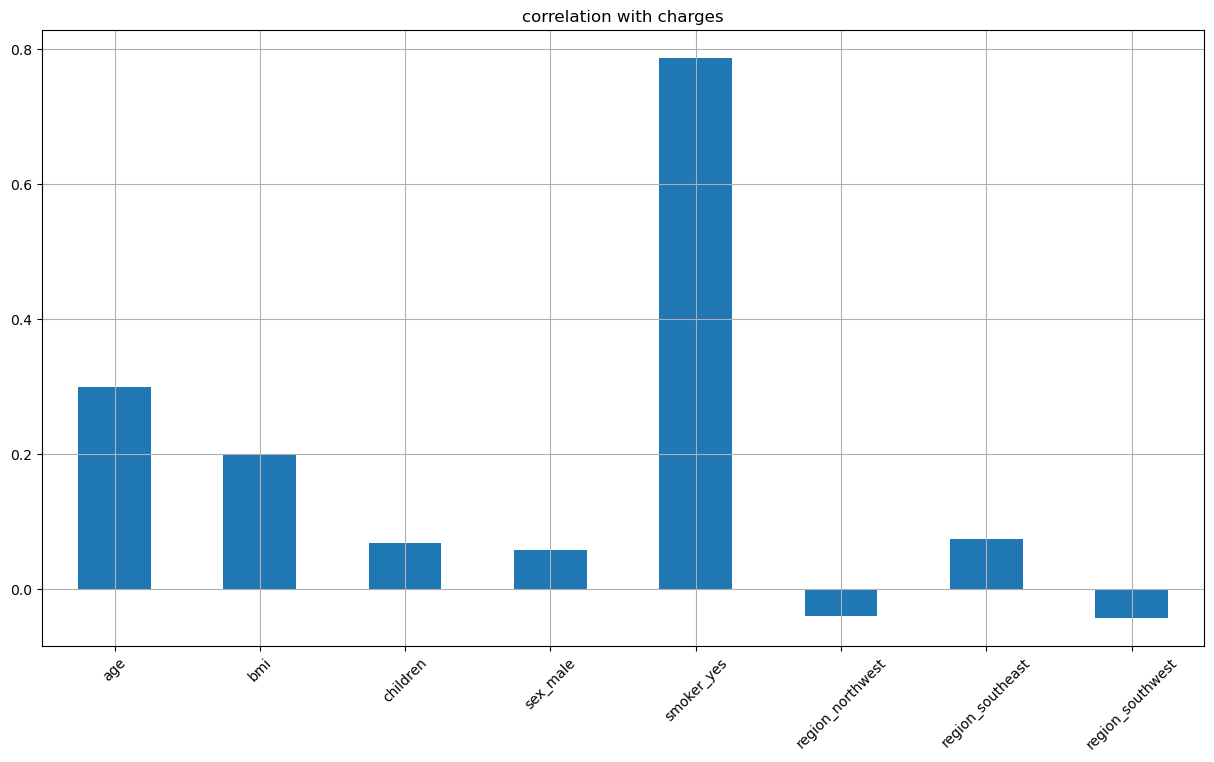

In [31]:
df2.corrwith(df['charges']).plot.bar(
figsize=(15, 8), title='correlation with charges', rot= 45, grid= True)

In [32]:
corr = df.corr()

<AxesSubplot:>

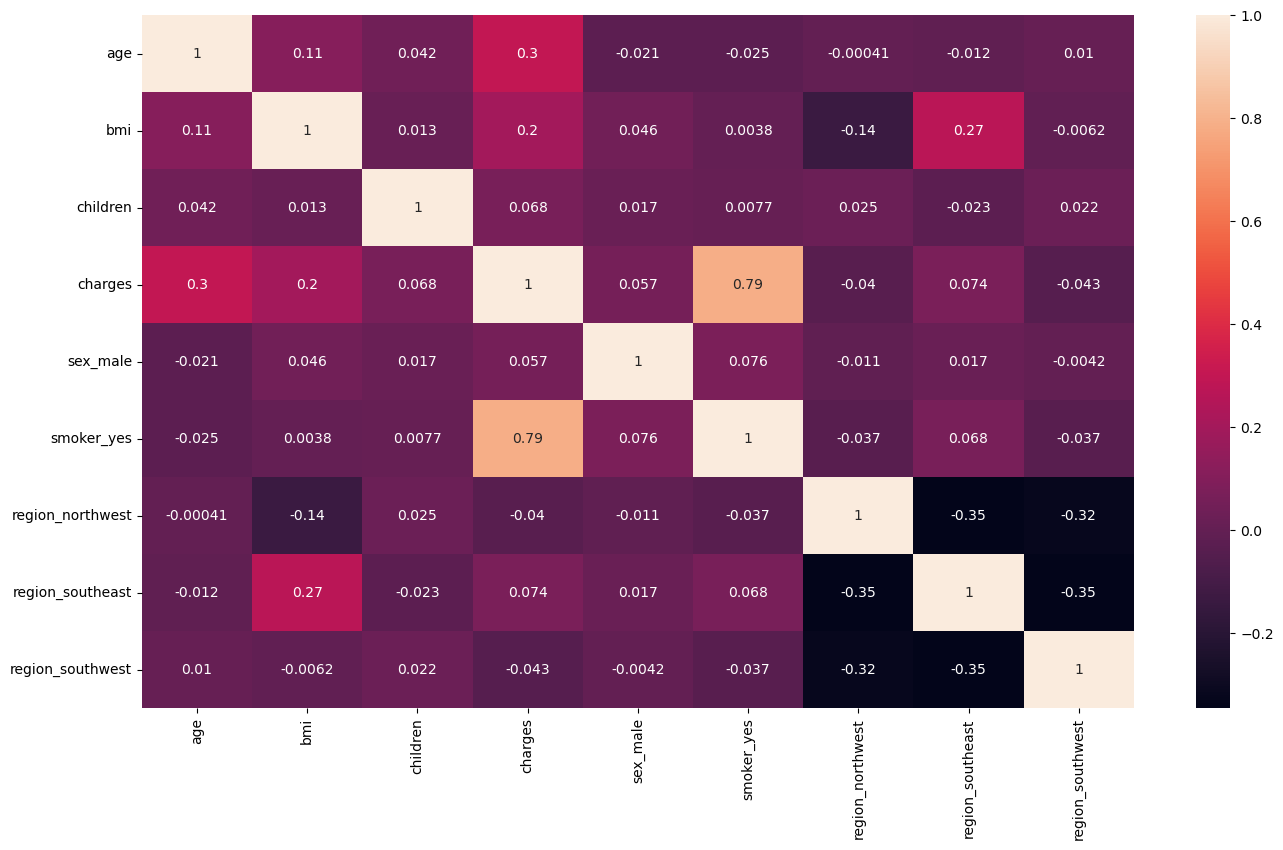

In [33]:
plt.figure(figsize = (16, 9))
sns.heatmap(corr, annot = True, )

In [34]:
# now distingusing the independent and dependent subjects

In [35]:
x = df.drop(columns= 'charges')
y = df.charges

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [38]:
x_train.shape

(1070, 8)

In [39]:
y_train.shape

(1070,)

In [40]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [41]:
x_test

array([[ 0.88804863, -0.03584905, -0.1324111 , ..., -0.60033831,
        -0.59458839,  2.03809866],
       [ 0.5279926 , -0.18082248, -0.1324111 , ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.60000381,  1.77457214,  0.71249783, ...,  1.66572743,
        -0.59458839, -0.49065338],
       ...,
       [ 1.24810465,  1.72479211, -0.97732004, ..., -0.60033831,
        -0.59458839, -0.49065338],
       [-0.69619788,  1.50995197,  1.55740677, ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.4559814 , -0.97992301,  1.55740677, ..., -0.60033831,
        -0.59458839, -0.49065338]])

In [42]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [43]:
#building the models

In [44]:
#LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = reg.predict(x_test)

In [47]:
from sklearn.metrics import r2_score


In [48]:
r2_score(y_test, y_pred)

0.7997338990335741

In [51]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [53]:
y_pred = RFR.predict(x_test)

In [56]:
r2_score(y_test, y_pred)

0.8720300884230625

In [57]:
#XGboost regression

In [103]:
from xgboost import XGBRFRegressor
XG = XGBRFRegressor()
XG.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [104]:
y_predi = XG.predict(x_test)

In [106]:
r2_score(y_test, y_predi)

0.8918959266688847

In [88]:
#now predict charges for new cutomers

In [89]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [90]:
random_calc1 = [[40, 45.5, 4, 1,1,0,0,0]]

In [91]:
XG.predict(sc.transform(random_calc))

C:\Users\soumy\anaconda11\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43522.168], dtype=float32)

In [92]:
#example - 1

In [93]:
# Name : soumya, age: 19, children : 0, sex : male, smoker : no, region : northwest

In [94]:
random_calc2 = [[19, 27.5, 0, 0,0,1,0,0]]

In [95]:
XG.predict(random_calc2)

array([18191.78], dtype=float32)